In [18]:
import pandas as pd
import numpy as np

df = pd.read_csv("Data/car_prices_encoded.csv")

In [19]:
df.head()

,Levy,Model,Prod. year,Leather interior,Engine volume,Mileage,Cylinders,Doors,Wheel,Airbags,...,Category_Hatchback,Category_Jeep,Category_Limousine,Category_Microbus,Category_Minivan,Category_Pickup,Category_Sedan,Category_Universal,Manufacturer_target,Price
0,1399,7109.893637,2010,True,3.5,186005,6,4,0,12,...,False,True,False,False,False,False,False,False,12667.128947,13328
1,1018,10796.543031,2011,False,3.0,192000,6,4,0,8,...,False,True,False,False,False,False,False,False,13745.235236,16621
2,0,10800.315909,2006,False,1.3,200000,4,4,1,2,...,True,False,False,False,False,False,False,False,11076.445067,8467
3,862,8172.567881,2011,True,2.5,168966,4,4,0,0,...,False,True,False,False,False,False,False,False,12232.050682,3607
4,446,10800.315909,2014,True,1.3,91901,4,4,0,4,...,True,False,False,False,False,False,False,False,11076.445067,11726


In [20]:
df.shape

(17708, 49)

In [21]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV,KFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error, median_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.neural_network import MLPRegressor

In [22]:
X = df.drop("Price",axis=1)
y = df["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [23]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

----

**Linear Regression:**

In [24]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [25]:
y_pred = lr_model.predict(X_val)

print(f"R2 score: {r2_score(y_val, y_pred)}")
print(f"Mean squared error: {mean_squared_error(y_val, y_pred)}")
print(f"Mean absolute error: {mean_absolute_error(y_val, y_pred)}")
print(f"Median absolute error: {median_absolute_error(y_val, y_pred)}")
print(f"Mean absolute percentage error: {np.mean(np.abs((y_val - y_pred) / y_val)) * 100}")
print(f"Mean absolute scaled error: {np.mean(np.abs((y_val - y_pred) / np.mean(y_val))) * 100}")

R2 score: 0.43888682534113777
Mean squared error: 73055960.96645132
Mean absolute error: 6478.703335343236
Median absolute error: 4911.048224002821
Mean absolute percentage error: 1368.7549900758268
Mean absolute scaled error: 45.34889809326349


------

**Lasso:**

In [26]:
lasso_model = Lasso()
lasso_model.fit(X_train_scaled, y_train)

c:\Users\eslam\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.787e+08, tolerance: 1.609e+08
  model = cd_fast.enet_coordinate_descent(


,alpha,1.0
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [27]:
y_pred = lasso_model.predict(X_val_scaled)

print(f"R2 score: {r2_score(y_val, y_pred)}")
print(f"Mean squared error: {mean_squared_error(y_val, y_pred)}")
print(f"Mean absolute error: {mean_absolute_error(y_val, y_pred)}")
print(f"Median absolute error: {median_absolute_error(y_val, y_pred)}")
print(f"Mean absolute percentage error: {np.mean(np.abs((y_val - y_pred) / y_val)) * 100}")
print(f"Mean absolute scaled error: {np.mean(np.abs((y_val - y_pred) / np.mean(y_val))) * 100}")

R2 score: 0.43915341273367925
Mean squared error: 73021251.75087196
Mean absolute error: 6477.3527049449185
Median absolute error: 4913.439687644077
Mean absolute percentage error: 1368.403310770187
Mean absolute scaled error: 45.33944410268472


In [28]:
param_dist = {
    "alpha": [0.01, 0.1, 1, 10, 100],
    "max_iter": [1000, 2000, 3000],
    "tol": [0.0001, 0.001, 0.01]
}
kf = KFold(n_splits=5, shuffle=True, random_state=42)

lasso_random_search = RandomizedSearchCV(estimator = lasso_model,
                                        param_distributions= param_dist,
                                        cv=kf,
                                        scoring="r2",
                                        n_jobs = -1,)

lasso_random_search.fit(X_train_scaled, y_train)

,estimator,Lasso()
,param_distributions,"{'alpha': [0.01, 0.1, ...], 'max_iter': [1000, 2000, ...], 'tol': [0.0001, 0.001, ...]}"
,n_iter,10
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,KFold(n_split... shuffle=True)
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [29]:
print("Best Parameters:", lasso_random_search.best_params_)
print("Best CV Score:", lasso_random_search.best_score_)

y_pred = lasso_random_search.best_estimator_.predict(X_val_scaled)
print("Test R2:", r2_score(y_val, y_pred))
print("Test MSE:", mean_squared_error(y_val, y_pred))

Best Parameters: {'tol': 0.01, 'max_iter': 1000, 'alpha': 10}
Best CV Score: 0.41564116080397095
Test R2: 0.4395806289191707
Test MSE: 72965628.9453827


----

**Ridge:**

In [30]:
ridge_model = Ridge()
ridge_model.fit(X_train_scaled, y_train)

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [31]:
y_pred = ridge_model.predict(X_val_scaled)

print(f"R2 score: {r2_score(y_val, y_pred)}")
print(f"Mean squared error: {mean_squared_error(y_val, y_pred)}")
print(f"Mean absolute error: {mean_absolute_error(y_val, y_pred)}")
print(f"Median absolute error: {median_absolute_error(y_val, y_pred)}")
print(f"Mean absolute percentage error: {np.mean(np.abs((y_val - y_pred) / y_val)) * 100}")
print(f"Mean absolute scaled error: {np.mean(np.abs((y_val - y_pred) / np.mean(y_val))) * 100}")

R2 score: 0.43891309491638064
Mean squared error: 73052540.71337186
Mean absolute error: 6478.511999330697
Median absolute error: 4909.68954295985
Mean absolute percentage error: 1368.7997500612848
Mean absolute scaled error: 45.347558800987706


In [32]:
param_dist = {
    "alpha": [0.01, 0.1, 1, 10, 100],
    "max_iter": [1000, 2000, 3000],
    "tol": [0.0001, 0.001, 0.01],
    "solver": ["auto", "svd", "cholesky", "lsqr", "sparse_cg", "sag", "saga"]
}
kf = KFold(n_splits=5, shuffle=True, random_state=42)

ridge_random_search = RandomizedSearchCV(estimator = ridge_model,
                                        param_distributions= param_dist,
                                        cv=kf,
                                        scoring="r2",
                                        n_jobs = -1)

ridge_random_search.fit(X_train_scaled, y_train)

,estimator,Ridge()
,param_distributions,"{'alpha': [0.01, 0.1, ...], 'max_iter': [1000, 2000, ...], 'solver': ['auto', 'svd', ...], 'tol': [0.0001, 0.001, ...]}"
,n_iter,10
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,KFold(n_split... shuffle=True)
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [33]:
print("Best Parameters:", ridge_random_search.best_params_)
print("Best CV Score:", ridge_random_search.best_score_)

y_pred = ridge_random_search.best_estimator_.predict(X_val_scaled)
print("Test R2:", r2_score(y_val, y_pred))
print("Test MSE:", mean_squared_error(y_val, y_pred))

Best Parameters: {'tol': 0.001, 'solver': 'lsqr', 'max_iter': 1000, 'alpha': 100}
Best CV Score: 0.4156255417322853
Test R2: 0.4394668914741521
Test MSE: 72980437.36321884


----

**SVR:**

In [34]:
svm_model = SVR()
svm_model.fit(X_train_scaled, y_train)

,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,1.0
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [35]:
y_pred = svm_model.predict(X_val_scaled)

print(f"R2 score: {r2_score(y_val, y_pred)}")
print(f"Mean squared error: {mean_squared_error(y_val, y_pred)}")
print(f"Mean absolute error: {mean_absolute_error(y_val, y_pred)}")
print(f"Median absolute error: {median_absolute_error(y_val, y_pred)}")
print(f"Mean absolute percentage error: {np.mean(np.abs((y_val - y_pred) / y_val)) * 100}")
print(f"Mean absolute scaled error: {np.mean(np.abs((y_val - y_pred) / np.mean(y_val))) * 100}")

R2 score: -0.014742608853360872
Mean squared error: 132117725.5701694
Mean absolute error: 8850.793714342704
Median absolute error: 7241.959276321697
Mean absolute percentage error: 1678.3591422487848
Mean absolute scaled error: 61.95278922660531


In [36]:
param_dist = {
    "kernel": ["linear", "poly", "rbf", "sigmoid"],
    "C": [0.01, 0.1, 1, 10, 100],
    "gamma": [0.01, 0.1, 1, 10, 100, "auto", "scale"],
    "epsilon": [0.01, 0.1, 1, 10, 100]
}
kf = KFold(n_splits=5, shuffle=True, random_state=42)

svr_random_search = RandomizedSearchCV(estimator = svm_model,
                                        param_distributions= param_dist,
                                        cv=kf,
                                        scoring="r2",
                                        n_jobs = -1)

svr_random_search.fit(X_train_scaled, y_train)

,estimator,SVR()
,param_distributions,"{'C': [0.01, 0.1, ...], 'epsilon': [0.01, 0.1, ...], 'gamma': [0.01, 0.1, ...], 'kernel': ['linear', 'poly', ...]}"
,n_iter,10
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,KFold(n_split... shuffle=True)
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [37]:
print("Best Parameters:", svr_random_search.best_params_)
print("Best CV Score:", svr_random_search.best_score_)

y_pred = svr_random_search.best_estimator_.predict(X_val_scaled)
print("Test R2:", r2_score(y_val, y_pred))
print("Test MSE:", mean_squared_error(y_val, y_pred))

Best Parameters: {'kernel': 'linear', 'gamma': 'auto', 'epsilon': 1, 'C': 10}
Best CV Score: 0.3947190222546115
Test R2: 0.41369284313899857
Test MSE: 76336173.69977015


----

**KNN:**

In [38]:
knn_model = KNeighborsRegressor()
knn_model.fit(X_train_scaled, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [39]:
y_pred = knn_model.predict(X_val_scaled)

print(f"R2 score: {r2_score(y_val, y_pred)}")
print(f"Mean squared error: {mean_squared_error(y_val, y_pred)}")
print(f"Mean absolute error: {mean_absolute_error(y_val, y_pred)}")
print(f"Median absolute error: {median_absolute_error(y_val, y_pred)}")
print(f"Mean absolute percentage error: {np.mean(np.abs((y_val - y_pred) / y_val)) * 100}")
print(f"Mean absolute scaled error: {np.mean(np.abs((y_val - y_pred) / np.mean(y_val))) * 100}")

R2 score: 0.6033730522619878
Mean squared error: 51640139.85201354
Mean absolute error: 4627.146706812195
Median absolute error: 2822.2000000000007
Mean absolute percentage error: 1158.8447803703295
Mean absolute scaled error: 32.38858049342817


In [40]:
param_dist = {
    "n_neighbors": [2, 3, 4, 5, 6, 7, 8, 9, 10],
    "weights": ["uniform", "distance"],
    "metric": ["minkowski", "euclidean", "manhattan"],
    "algorithm": ["auto", "ball_tree", "kd_tree", "brute"]
}
kf = KFold(n_splits=5, shuffle=True, random_state=42)

knn_random_search = RandomizedSearchCV(estimator = knn_model,
                                        param_distributions= param_dist,
                                        cv=kf,
                                        scoring="r2",
                                        n_jobs = -1,
                                        n_iter=30)

knn_random_search.fit(X_train_scaled, y_train)

,estimator,KNeighborsRegressor()
,param_distributions,"{'algorithm': ['auto', 'ball_tree', ...], 'metric': ['minkowski', 'euclidean', ...], 'n_neighbors': [2, 3, ...], 'weights': ['uniform', 'distance']}"
,n_iter,30
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,KFold(n_split... shuffle=True)
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [41]:
print("Best Parameters:", knn_random_search.best_params_)
print("Best CV Score:", knn_random_search.best_score_)

y_pred = knn_random_search.best_estimator_.predict(X_val_scaled)
print("Test R2:", r2_score(y_val, y_pred))
print("Test MSE:", mean_squared_error(y_val, y_pred))

Best Parameters: {'weights': 'distance', 'n_neighbors': 10, 'metric': 'manhattan', 'algorithm': 'brute'}
Best CV Score: 0.6293701017445492
Test R2: 0.6414753837333059
Test MSE: 46679282.459221534


----

**Decision Tree:**

In [42]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train_scaled, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [43]:
y_pred = dt_model.predict(X_val_scaled)

print(f"R2 score: {r2_score(y_val, y_pred)}")
print(f"Mean squared error: {mean_squared_error(y_val, y_pred)}")
print(f"Mean absolute error: {mean_absolute_error(y_val, y_pred)}")
print(f"Median absolute error: {median_absolute_error(y_val, y_pred)}")
print(f"Mean absolute percentage error: {np.mean(np.abs((y_val - y_pred) / y_val)) * 100}")
print(f"Mean absolute scaled error: {np.mean(np.abs((y_val - y_pred) / np.mean(y_val))) * 100}")

R2 score: 0.5881080732236991
Mean squared error: 53627613.61513258
Mean absolute error: 4099.889279303028
Median absolute error: 1881.0
Mean absolute percentage error: 1491.7827094456138
Mean absolute scaled error: 28.69794332246985


In [44]:
param_dist = {
    "criterion": ['poisson', 'squared_error', 'absolute_error', 'friedman_mse'],
    "splitter": ["best", "random"],
    "max_depth": [2, 3, 4, 5, 6, 7, 8, 9, 10,None],
    "min_samples_split": [2, 3, 4, 5, 6, 7, 8, 9, 10],
    "min_samples_leaf": [1,2, 3, 4, 5, 6, 7, 8, 9, 10],
    "max_features": ["sqrt", "log2", None],
    "ccp_alpha": [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
}
kf = KFold(n_splits=5, shuffle=True, random_state=42)

dt_random_search = RandomizedSearchCV(estimator = dt_model,
                                        param_distributions= param_dist,
                                        cv=kf,
                                        scoring="r2",
                                        n_jobs = -1,
                                        n_iter=40)

dt_random_search.fit(X_train_scaled, y_train)

,estimator,DecisionTreeRegressor()
,param_distributions,"{'ccp_alpha': [0.0, 0.1, ...], 'criterion': ['poisson', 'squared_error', ...], 'max_depth': [2, 3, ...], 'max_features': ['sqrt', 'log2', ...], ...}"
,n_iter,40
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,KFold(n_split... shuffle=True)
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [45]:
print("Best Parameters:", dt_random_search.best_params_)
print("Best CV Score:", dt_random_search.best_score_)

y_pred = dt_random_search.best_estimator_.predict(X_val_scaled)
print("Test R2:", r2_score(y_val, y_pred))
print("Test MSE:", mean_squared_error(y_val, y_pred))

Best Parameters: {'splitter': 'best', 'min_samples_split': 5, 'min_samples_leaf': 9, 'max_features': None, 'max_depth': 8, 'criterion': 'poisson', 'ccp_alpha': 0.4}
Best CV Score: 0.5974756236115359
Test R2: 0.6122529146746597
Test MSE: 50483997.18578222


-----

**Random Forest:**

In [46]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train_scaled, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [47]:
y_pred = rf_model.predict(X_val_scaled)

print(f"R2 score: {r2_score(y_val, y_pred)}")
print(f"Mean squared error: {mean_squared_error(y_val, y_pred)}")
print(f"Mean absolute error: {mean_absolute_error(y_val, y_pred)}")
print(f"Median absolute error: {median_absolute_error(y_val, y_pred)}")
print(f"Mean absolute percentage error: {np.mean(np.abs((y_val - y_pred) / y_val)) * 100}")
print(f"Mean absolute scaled error: {np.mean(np.abs((y_val - y_pred) / np.mean(y_val))) * 100}")

R2 score: 0.7673844055761943
Mean squared error: 30286146.4565418
Mean absolute error: 3210.905079040706
Median absolute error: 1788.7391428571427
Mean absolute percentage error: 1212.176615816833
Mean absolute scaled error: 22.475331818669357


In [48]:
param_dist = {
    "n_estimators": [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    "criterion": ['poisson', 'squared_error', 'absolute_error', 'friedman_mse'],
    "max_depth": [2, 3, 4, 5, 6, 7, 8, 9, 10,None],
    "min_samples_split": [2, 3, 4, 5, 6, 7, 8, 9, 10],
    "min_samples_leaf": [1,2, 3, 4, 5, 6, 7, 8, 9, 10],
    "bootstrap": [True, False],
    "max_features": ["sqrt", "log2", None],
    "ccp_alpha": [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
}
kf = KFold(n_splits=5, shuffle=True, random_state=42)

rf_random_search = RandomizedSearchCV(estimator = rf_model,
                                        param_distributions= param_dist,
                                        cv=kf,
                                        scoring="r2",
                                        n_jobs = -1,
                                        n_iter=40)

rf_random_search.fit(X_train_scaled, y_train)

,estimator,RandomForestRegressor()
,param_distributions,"{'bootstrap': [True, False], 'ccp_alpha': [0.0, 0.1, ...], 'criterion': ['poisson', 'squared_error', ...], 'max_depth': [2, 3, ...], ...}"
,n_iter,40
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,KFold(n_split... shuffle=True)
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [49]:
print("Best Parameters:", rf_random_search.best_params_)
print("Best CV Score:", rf_random_search.best_score_)

y_pred = rf_random_search.best_estimator_.predict(X_val_scaled)
print("Test R2:", r2_score(y_val, y_pred))
print("Test MSE:", mean_squared_error(y_val, y_pred))

Best Parameters: {'n_estimators': 100, 'min_samples_split': 8, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': None, 'criterion': 'squared_error', 'ccp_alpha': 0.7, 'bootstrap': True}
Best CV Score: 0.7490769800236746
Test R2: 0.7663481511991203
Test MSE: 30421064.976979077


-----

**XGB:**

In [50]:
xgb_model = XGBRegressor()
xgb_model.fit(X_train_scaled, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [51]:
y_pred = xgb_model.predict(X_val_scaled)

print(f"R2 score: {r2_score(y_val, y_pred)}")
print(f"Mean squared error: {mean_squared_error(y_val, y_pred)}")
print(f"Mean absolute error: {mean_absolute_error(y_val, y_pred)}")
print(f"Median absolute error: {median_absolute_error(y_val, y_pred)}")
print(f"Mean absolute percentage error: {np.mean(np.abs((y_val - y_pred) / y_val)) * 100}")
print(f"Mean absolute scaled error: {np.mean(np.abs((y_val - y_pred) / np.mean(y_val))) * 100}")

R2 score: 0.748555064201355
Mean squared error: 32737686.0
Mean absolute error: 3662.279296875
Median absolute error: 2245.44140625
Mean absolute percentage error: 1114.5347236070215
Mean absolute scaled error: 25.634810658455166


-----

**GaussianNB:**

In [52]:
gnb_model = GaussianNB()
gnb_model.fit(X_train_scaled, y_train)

,priors,None
,var_smoothing,1e-09


In [53]:
y_pred = gnb_model.predict(X_val_scaled)

print(f"R2 score: {r2_score(y_val, y_pred)}")
print(f"Mean squared error: {mean_squared_error(y_val, y_pred)}")
print(f"Mean absolute error: {mean_absolute_error(y_val, y_pred)}")
print(f"Median absolute error: {median_absolute_error(y_val, y_pred)}")
print(f"Mean absolute percentage error: {np.mean(np.abs((y_val - y_pred) / y_val)) * 100}")
print(f"Mean absolute scaled error: {np.mean(np.abs((y_val - y_pred) / np.mean(y_val))) * 100}")

R2 score: -0.6505224832359888
Mean squared error: 214895161.18178397
Mean absolute error: 10524.742190440345
Median absolute error: 7139.0
Mean absolute percentage error: 1711.291967280386
Mean absolute scaled error: 73.66990528002991


----

**Gradient Boost:**

In [54]:
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train_scaled, y_train)

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [55]:
y_pred = gb_model.predict(X_val_scaled)

print(f"R2 score: {r2_score(y_val, y_pred)}")
print(f"Mean squared error: {mean_squared_error(y_val, y_pred)}")
print(f"Mean absolute error: {mean_absolute_error(y_val, y_pred)}")
print(f"Median absolute error: {median_absolute_error(y_val, y_pred)}")
print(f"Mean absolute percentage error: {np.mean(np.abs((y_val - y_pred) / y_val)) * 100}")
print(f"Mean absolute scaled error: {np.mean(np.abs((y_val - y_pred) / np.mean(y_val))) * 100}")

R2 score: 0.6113398875084075
Mean squared error: 50602871.73735478
Mean absolute error: 5041.773611259573
Median absolute error: 3571.952082402102
Mean absolute percentage error: 1195.59062693902
Mean absolute scaled error: 35.290839211455015


-----

**LGBM:**

In [56]:
lgbm_model = LGBMRegressor()
lgbm_model.fit(X_train_scaled, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001496 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1018
[LightGBM] [Info] Number of data points in the train set: 12395, number of used features: 44
[LightGBM] [Info] Start training from score 14041.083017


,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.1
,n_estimators,100
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [57]:
y_pred = lgbm_model.predict(X_val_scaled)

print(f"R2 score: {r2_score(y_val, y_pred)}")
print(f"Mean squared error: {mean_squared_error(y_val, y_pred)}")
print(f"Mean absolute error: {mean_absolute_error(y_val, y_pred)}")
print(f"Median absolute error: {median_absolute_error(y_val, y_pred)}")
print(f"Mean absolute percentage error: {np.mean(np.abs((y_val - y_pred) / y_val)) * 100}")
print(f"Mean absolute scaled error: {np.mean(np.abs((y_val - y_pred) / np.mean(y_val))) * 100}")

R2 score: 0.7370371520704616
Mean squared error: 34237306.16492274
Mean absolute error: 3854.9143480917814
Median absolute error: 2539.4440097830393
Mean absolute percentage error: 1061.4189973947707
Mean absolute scaled error: 26.98319538358857


c:\Users\eslam\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [58]:
param_dist = {
    "boosting_type": ["gbdt", "dart", "goss"],
    "learning_rate": [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1],
    "n_estimators": [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    "num_leaves": [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    "max_depth": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}
kf = KFold(n_splits=5, shuffle=True, random_state=42)

lgbm_random_search = RandomizedSearchCV(estimator = lgbm_model,
                                        param_distributions= param_dist,
                                        cv=kf,
                                        scoring="r2",
                                        n_jobs = -1,
                                        n_iter=30)

lgbm_random_search.fit(X_train_scaled, y_train)

[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000911 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1018
[LightGBM] [Info] Number of data points in the train set: 12395, number of used features: 44
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score 14041.083017
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

,estimator,LGBMRegressor()
,param_distributions,"{'boosting_type': ['gbdt', 'dart', ...], 'learning_rate': [0.01, 0.02, ...], 'max_depth': [1, 2, ...], 'n_estimators': [10, 20, ...], ...}"
,n_iter,30
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,KFold(n_split... shuffle=True)
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [59]:
print("Best Parameters:", lgbm_random_search.best_params_)
print("Best CV Score:", lgbm_random_search.best_score_)

y_pred = lgbm_random_search.best_estimator_.predict(X_val_scaled)
print("Test R2:", r2_score(y_val, y_pred))
print("Test MSE:", mean_squared_error(y_val, y_pred))

Best Parameters: {'num_leaves': 100, 'n_estimators': 40, 'max_depth': 10, 'learning_rate': 0.09, 'boosting_type': 'goss'}
Best CV Score: 0.7095627884413835
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
Test R2: 0.7215173005429514
Test MSE: 36257963.88355182


c:\Users\eslam\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


---

**Cat Boost:**

In [60]:
cb_model = CatBoostRegressor()
cb_model.fit(X_train_scaled, y_train)

Learning rate set to 0.060941
0:	learn: 11072.9846204	total: 122ms	remaining: 2m 1s
1:	learn: 10791.3862243	total: 124ms	remaining: 1m 1s
2:	learn: 10536.1538758	total: 126ms	remaining: 42s
3:	learn: 10310.2733877	total: 129ms	remaining: 32.1s
4:	learn: 10112.9865416	total: 131ms	remaining: 26.1s
5:	learn: 9918.9010429	total: 133ms	remaining: 22.1s
6:	learn: 9743.4520785	total: 136ms	remaining: 19.3s
7:	learn: 9585.6239129	total: 138ms	remaining: 17.1s
8:	learn: 9430.8059944	total: 141ms	remaining: 15.5s
9:	learn: 9298.5502850	total: 143ms	remaining: 14.2s
10:	learn: 9168.5451453	total: 146ms	remaining: 13.1s
11:	learn: 9036.2408092	total: 148ms	remaining: 12.2s
12:	learn: 8921.3280006	total: 150ms	remaining: 11.4s
13:	learn: 8817.1145268	total: 153ms	remaining: 10.8s
14:	learn: 8725.6074590	total: 156ms	remaining: 10.2s
15:	learn: 8633.6600181	total: 158ms	remaining: 9.72s
16:	learn: 8528.4117056	total: 160ms	remaining: 9.28s
17:	learn: 8447.2007867	total: 163ms	remaining: 8.88s
18:	l

In [61]:
y_pred = cb_model.predict(X_val_scaled)

print(f"R2 score: {r2_score(y_val, y_pred)}")
print(f"Mean squared error: {mean_squared_error(y_val, y_pred)}")
print(f"Mean absolute error: {mean_absolute_error(y_val, y_pred)}")
print(f"Median absolute error: {median_absolute_error(y_val, y_pred)}")
print(f"Mean absolute percentage error: {np.mean(np.abs((y_val - y_pred) / y_val)) * 100}")
print(f"Mean absolute scaled error: {np.mean(np.abs((y_val - y_pred) / np.mean(y_val))) * 100}")

R2 score: 0.7514676876015182
Mean squared error: 32358475.497432526
Mean absolute error: 3704.0489563250394
Median absolute error: 2371.668233068711
Mean absolute percentage error: 1150.8110253872655
Mean absolute scaled error: 25.92718480201009


---

**bagging:**

In [62]:
bagging_model = BaggingRegressor(estimator=DecisionTreeRegressor(),
                                n_estimators=100,
                                max_samples=0.8,      
                                max_features=1.0,      
                                bootstrap=True,        
                                random_state=42,
                                n_jobs=-1 )

bagging_model.fit(X_train_scaled, y_train)

,estimator,DecisionTreeRegressor()
,n_estimators,100
,max_samples,0.8
,max_features,1.0
,bootstrap,True
,bootstrap_features,False
,oob_score,False
,warm_start,False
,n_jobs,-1
,random_state,42
,verbose,0


In [63]:
y_pred = bagging_model.predict(X_val_scaled)

print(f"R2 score: {r2_score(y_val, y_pred)}")
print(f"Mean squared error: {mean_squared_error(y_val, y_pred)}")
print(f"Mean absolute error: {mean_absolute_error(y_val, y_pred)}")
print(f"Median absolute error: {median_absolute_error(y_val, y_pred)}")
print(f"Mean absolute percentage error: {np.mean(np.abs((y_val - y_pred) / y_val)) * 100}")
print(f"Mean absolute scaled error: {np.mean(np.abs((y_val - y_pred) / np.mean(y_val))) * 100}")

R2 score: 0.7675294363066384
Mean squared error: 30267263.70728413
Mean absolute error: 3224.473763955819
Median absolute error: 1747.2199999999998
Mean absolute percentage error: 1216.387706444674
Mean absolute scaled error: 22.57030837148021


----

**Compare:**

c:\Users\eslam\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
Model Performance:
                Model     Score  Mean Squared Error  Mean Absolute Error
0      Decision Tree  0.627367        4.752515e+07         4.752515e+07
1      Random Forest  0.792755        2.643178e+07         2.643178e+07
2            XGBoost  0.780310        2.801901e+07         2.801901e+07
3           LightGBM  0.731885        3.419515e+07         3.419515e+07
4  Gradient Boosting  0.616306        4.893588e+07         4.893588e+07
5           CatBoost  0.768428        2.953444e+07         2.953444e+07
6            Bagging  0.790728        2.669027e+07         2.669027e+07

Best Model Based on r2 Score: Random Forest (r2 Score = 0.7928)


<Figure size 1000x600 with 0 Axes>

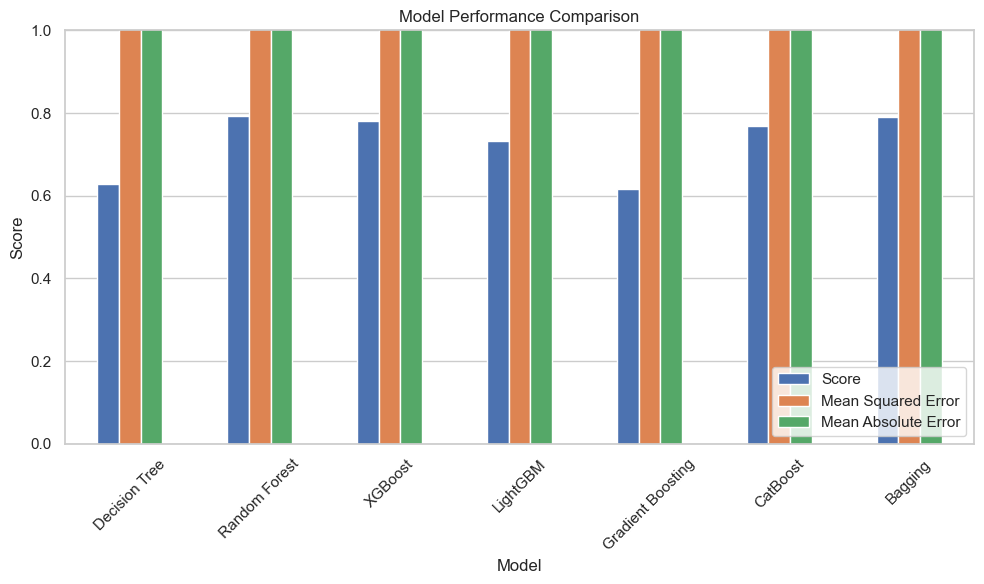

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

results = []
models = {
    "Decision Tree": dt_random_search.best_estimator_,
    "Random Forest": rf_model,
    "XGBoost": xgb_model,
    "LightGBM": lgbm_random_search.best_estimator_,
    "Gradient Boosting": gb_model,
    "CatBoost": cb_model,
    "Bagging": bagging_model
}
best_model = None
best_model_name = ""
best_score = 0

for name, model in models.items():
    try:
        y_pred = model.predict(X_test_scaled)

        # Basic metrics
        score = np.abs(r2_score(y_test, y_pred))
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_squared_error(y_test, y_pred)

        results.append({
            "Model": name,
            "Score": score,
            "Mean Squared Error": mse,
            "Mean Absolute Error": mae,
        })

        if score > best_score:
            best_score = score
            best_model = model
            best_model_name = name

    except Exception as e:
        print(f"[{name}] Error during training/evaluation: {e}")

# Results as DataFrame
results_df = pd.DataFrame(results)
print("Model Performance:\n", results_df)

# Best model
print(f"\nBest Model Based on r2 Score: {best_model_name} (r2 Score = {best_score:.4f})")

# Plot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
results_df.set_index("Model")[["Score", "Mean Squared Error", "Mean Absolute Error"]].plot(kind="bar", figsize=(10, 6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()
